## Mini Jupyter Exercise #3

### Gradient Descent

In [1]:
import numpy as np
from IPython.display import display, Latex

# Tolerance for the size of the gradient
tol = 10**(-12)
# Maximum number of iterations
max_iter = 10000
# Paramter for gradient calculations
eps = 10**(-12)

# Definition of the function
func_f = lambda w: (w[0]**2 + w[1] - 11)**2 + (w[0] + w[1]**2 -7)**2

# Numerical computation of the gradient
func_grad = lambda func, w: [(func([w[0]+eps,w[1]])-func([w[0],w[1]]))/eps, (func([w[0],w[1]+eps])-func([w[0],w[1]]))/eps]


# Problem 1

# An array to hold all the iterate values
w_iterates = np.zeros((2,max_iter))
# Initialization
w_iterates[:,0] = [0, -4]
# Tuple of stepsizes
gamma = [0.005, 0.01]
# Number of iterations for the two stepsizes
num_iters = np.zeros(2, dtype=int)
# Success flags for the two stepsizes
success_flag = [False, False]

# Gradient descent
for idx_i in range(2):
    for iter in range(max_iter):
        w_iterates[:,iter+1] = w_iterates[:,iter] - gamma[idx_i]*np.array(func_grad(func_f, w_iterates[:,iter]))
        if np.linalg.norm(func_grad(func_f, w_iterates[:,iter+1])) < tol:
            success_flag[idx_i] = True
            num_iters[idx_i] = iter+1
            break
    # Printing of final results
    if success_flag[idx_i]:
        display(Latex(r'In the case of stepsize $\gamma$ = {}, gradient descent converges to $\mathbf{{w}}^*$ = {} in\
            {} iterations.'.format(gamma[idx_i],w_iterates[:,num_iters[idx_i]],num_iters[idx_i])))
    else:
        display(Latex(r'In the case of stepsize $\gamma$ = {}, gradient descent does not converge within {} iterations.'\
            .format(gamma[idx_i],max_iter)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

**Convergence speed as a function of the stepsize:** Stepsize is one of the most important factors that determines convergence speed of gradient descent. Make the stepsize too large and gradient descent will keep on bouncing around a minimizer; conversely, make the stepsize too small and gradient descent will take forever to converge. In this example, since the function is relatively well-behaved and since we are starting from a nice place, both stepsize choices are pretty good in terms of "not too large" and "not too small." As such, we see that gradient descent with $\gamma = 0.01$ takes less than half the number of iterations to converge when compared with the stepsize of $\gamma = 0.005$.

In [2]:
# Problem 2

# A three-dimensional array to hold all the iterate values
w_iterates = np.zeros((4,2,max_iter)) # (number of initialization, dimensions, maximum number of iterations)
# Four initializations
w_iterates[0,:,0] = [0, -4]
w_iterates[1,:,0] = [0.5, -4]
w_iterates[2,:,0] = [0, 4]
w_iterates[3,:,0] = [0.5, 4]
# Stepsize
gamma = 0.01
# Number of iterations for the four initializations
num_iters = np.zeros(4, dtype=int)
# Success flags for the four initializations
success_flag = [False, False, False, False]

# Gradient descent
for idx_i in range(4):
    for iter in range(max_iter):
        w_iterates[idx_i,:,iter+1] = w_iterates[idx_i,:,iter] - gamma*np.array(func_grad(func_f, w_iterates[idx_i,:,iter]))
        if np.linalg.norm(func_grad(func_f, w_iterates[idx_i,:,iter+1])) < tol:
            success_flag[idx_i] = True
            num_iters[idx_i] = iter+1
            break
    # Printing of final results
    if success_flag[idx_i]:
        display(Latex(r'In the case of initialization $\mathbf{{w}}^0$ = {}, gradient descent converges to $\mathbf{{w}}^*$ = {}\
            in {} iterations.'.format(w_iterates[idx_i,:,0],w_iterates[idx_i,:,num_iters[idx_i]],num_iters[idx_i])))
    else:
        display(Latex(r'In the case of initialization $\mathbf{{w}}^0$ = {}, gradient descent does not converge within {}\
            iterations.'.format(gamma,max_iter)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We see that gradient descent converges for all four initializations. However, the solution returned by gradient descent in all four cases is different. This means that the function under consideration does not have a unique global solution. The four returned solutions are therefore either global minima (non-unique) or local minima. In order to shed light on this, let us evaluate the function values at these four solutions.

In [3]:
for idx_i in range(4):
    display(Latex(r'In the case of $\mathbf{{w}}^*$ = {}, we have that $f(\mathbf{{w}}^*)$ = {}.'\
                  .format(w_iterates[idx_i,:,num_iters[idx_i]],func_f(w_iterates[idx_i,:,num_iters[idx_i]]))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

We see that the function value for all solutions is $\approx 0$. We also know from the definition of the function that $f(\mathbf{w}) \geq 0$. Based on this, we can conclude that all four solutions are in fact global minima.

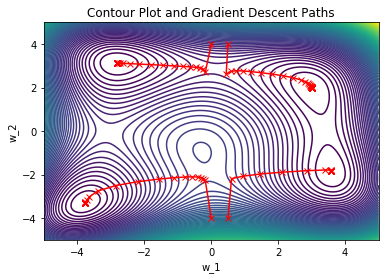

In [5]:
from matplotlib import pyplot as plt

# Creation of contour plot
x_grid = np.linspace(-5,5,1000)
y_grid = np.linspace(-5,5,1000)
xx, yy = np.meshgrid(x_grid,y_grid,sparse=False)
plt.contour(xx,yy,func_f([xx, yy]),100)

# Plotting of the gradient descent paths for the four different initializations
for idx_i in range(4):
    plt.plot(w_iterates[idx_i,0,0:num_iters[idx_i]], w_iterates[idx_i,1,0:num_iters[idx_i]], "rx-")
    
# Labeling of the contour plot
plt.title('Contour Plot and Gradient Descent Paths')
plt.xlabel('w_1')
plt.ylabel('w_2')
plt.show()

### Parameter Estimation

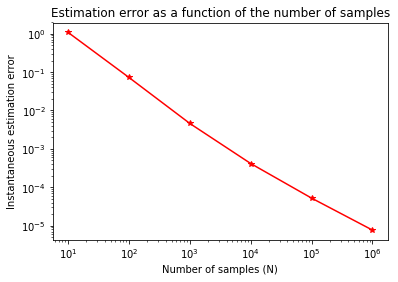

In [6]:
from scipy.stats import multivariate_normal as mv_randn

# Dimensionality of the random vector
m = 5
# Mean vector
mean_vec = [-1, 0, 4, 1, 0.5]
# Covariance matrix
cov_mat = 2*np.identity(m)
# Number of samples
N_list = [10**(i+1) for i in range(6)]
# Errors corresponding to different values of N
errors = np.empty(len(N_list))

# Multivariate Gaussian random variable with desired mean and covariance
X = mv_randn(mean_vec,cov_mat)

# Estimation and error calculation (combined into one operation)
for idx, N in enumerate(N_list):
    errors[idx] = np.linalg.norm(np.average(X.rvs(size=N),0)-mean_vec)**2

# Plotting of error as a function of the number of samples N on a log-log scale
plt.loglog(N_list, errors, 'r-*')
plt.title('Estimation error as a function of the number of samples')
plt.xlabel('Number of samples (N)')
plt.ylabel('Instantaneous estimation error')
plt.show()

We can see from the above plot that the relationship between $N$ and $e_N$ on a $\log$-$\log$ scale is *almost* linear with a negative slope. That is, $\log(e_N) \propto -\log(N)$. This implies that $e_N \propto N^{-1}$; that is, the instantaneous error seems to be inversely proportional to the number of samples used to obtain the estimate of the mean of a random vector.